In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
import os
import datetime
from mpl_toolkits.mplot3d import Axes3D

from termcolor import colored as cl
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# 資料前處理

In [5]:
df = pd.read_csv("carrefour_sales.csv")

In [6]:
df.columns=["id","order_date","product","sales_price","quantity","department","store","city","district","customer","sex","age_group"]
df['total_price'] = df['sales_price']*df['quantity']
df['order_date_notime'] = pd.to_datetime(df['order_date']).dt.floor('d')
df = df[df['quantity']>=0]
df = df[df['age_group'].notna()]

In [7]:
from sklearn.preprocessing import LabelEncoder
def labelencoding(table, n):
    map_code = pd.DataFrame()
    le = LabelEncoder()
    le.fit(table[n])
    map_code[n]=table[n]
    table[n] = le.transform(table[n])
    map_code['new_code']=table[n]
    return map_code

In [8]:
df

,id,order_date,product,sales_price,quantity,department,store,city,district,customer,sex,age_group,total_price,order_date_notime
0,10eed4a6-5b6b-40d9-84fe-e7152666d2d5,2021-07-09 17:32:43,99d32476-f1eb-4af8-a7d9-28ebd8e1ce12,85,3,7ed47ad3-61a2-423c-937b-c23bf4ad05f3,38177bc5-93b3-4b7a-ad27-d6aa162ccc9a,0ced232a-ba28-4238-8411-264c228aa751,de4598ec-8318-4e21-8e0a-510a49853a07,53867ee1-e97b-44c3-810b-cc0de8f49217,NaN,1.0,255,2021-07-09
1,b7cf4711-f248-4a12-8bb6-d7a330faac5e,2021-07-06 23:46:09,c54bcaef-b3b9-4601-a5da-8519d33d3b81,89,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,3f6de5e8-3b20-4237-89dc-ee4eff7625a3,08955352-31a8-44ac-8a5e-e13de23db4a2,df5f2a7b-ec52-4505-bd85-26a84438dee0,52eb5d34-a34b-4f29-9d83-e23d48d1e03b,NaN,1.0,89,2021-07-06
2,0b16dd32-838f-4948-bd95-916d7b1a0a42,2021-02-01 15:06:29,abad439e-5bc0-4097-82e8-e87f0cb057ff,64,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,68e916ca-f999-4e5a-9c34-f277f9bc2867,8c4f97b5-e3c1-4279-9829-ee56f920c12b,2b9626af-4919-45e4-873b-4a07a9749421,dbf9be47-c8e9-4fee-b92d-727f68afab96,NaN,1.0,64,2021-02-01
3,a4998917-ae04-45e4-a5fe-4dc4a1fa4b35,2021-01-12 20:40:10,fc007164-7f6e-4833-9e36-e141c3fb4fe6,75,1,22f2e7c7-6679-41fd-9c1d-6e9562b51bce,025c6e08-592c-4f3d-8a9e-6d6b685fef33,4b52005f-878a-4b2b-95ee-d9e2d719046a,9c10f54e-63e5-4b8f-b720-4d95639db9bf,8e5145fd-9b3e-448d-b22e-a81991161656,NaN,8.0,75,2021-01-12
4,a30dca13-d325-4a0c-a8fa-fb2ba762ad93,2021-07-05 00:03:59,f1fc2f7e-2aaa-484d-be31-8369b609cab0,75,2,451ffc74-a780-4ae0-adba-ff8caa8f4b91,025c6e08-592c-4f3d-8a9e-6d6b685fef33,4b52005f-878a-4b2b-95ee-d9e2d719046a,9c10f54e-63e5-4b8f-b720-4d95639db9bf,ba32d21e-9e8c-430b-b8f6-c11e0c34ffb7,NaN,8.0,150,2021-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17362457,5867bdad-9694-4467-a0bc-16e033229001,2020-05-09 03:33:54,4fca0aee-1e50-4269-825a-593d048c1505,149,1,fc537967-e742-4916-b487-8dedc17a11f5,fba05cc9-e1df-45b8-ba26-8f572aa41254,47dcfd11-1d5f-4fb6-b7e1-0e42c90a4ae3,12ef2c2c-a649-4f02-8796-5444ab19897c,74ba5ee0-dbab-4076-8d5c-817457907b10,NaN,4.0,149,2020-05-09
17362458,64207f8c-72be-46ee-ac80-8d3df7ded23f,2020-06-05 19:07:14,f95661c9-5e74-4175-83f8-c17c32f79295,0,1,fc537967-e742-4916-b487-8dedc17a11f5,fba05cc9-e1df-45b8-ba26-8f572aa41254,47dcfd11-1d5f-4fb6-b7e1-0e42c90a4ae3,12ef2c2c-a649-4f02-8796-5444ab19897c,b8de3c4d-b56f-42b7-88fd-c8b6c50f80f3,B,4.0,0,2020-06-05
17362459,c2ff56cc-09d0-4fb3-86a9-1c1d389238b3,2020-06-01 10:29:28,727fa7bc-7ff7-4fea-a988-c4f7fce68655,119,2,fc537967-e742-4916-b487-8dedc17a11f5,fba05cc9-e1df-45b8-ba26-8f572aa41254,47dcfd11-1d5f-4fb6-b7e1-0e42c90a4ae3,12ef2c2c-a649-4f02-8796-5444ab19897c,0b2331d4-1d32-4e1b-b18f-4587f879eebf,A,4.0,238,2020-06-01
17362460,62ae6ac2-8cbf-40ff-a1c5-dba9fcbd430b,2021-03-02 00:03:21,39cc3ff3-74b2-45a0-a3e0-2e01d3f96c68,39,2,fc537967-e742-4916-b487-8dedc17a11f5,fba05cc9-e1df-45b8-ba26-8f572aa41254,47dcfd11-1d5f-4fb6-b7e1-0e42c90a4ae3,12ef2c2c-a649-4f02-8796-5444ab19897c,0319a423-6e73-4be0-b9b3-e69df7f57cbc,NaN,2.0,78,2021-03-02


In [9]:
def checkunique(n):
    return df[n].unique()
checkunique('sex')

array([nan, 'A', 'B'], dtype=object)

In [10]:
minvalue = df.min()
minvalue

id                   0000028e-ff8f-471e-87ae-47024cb4e13f
order_date                            2020-04-29 00:00:39
product              0000c0d2-9ab6-42be-9ac9-f4dde5502019
sales_price                                             0
quantity                                                0
department           040ad82b-9260-4168-a8ec-cc73ca18c1c3
store                025c6e08-592c-4f3d-8a9e-6d6b685fef33
city                 03de1a9a-d2cb-479b-8754-586c55ca33ca
district             12ef2c2c-a649-4f02-8796-5444ab19897c
customer             00001f06-ae9a-4063-a22d-fd7754c89d74
age_group                                               0
total_price                                             0
order_date_notime                     2020-04-29 00:00:00
dtype: object

In [11]:
missing_values_count = df.isnull().sum()
missing_values_count[:10]

id             0
order_date     0
product        0
sales_price    0
quantity       0
department     0
store          0
city           0
district       0
customer       0
dtype: int64

In [12]:
df.shape

(16507519, 14)

In [13]:
checkunique('age_group')

array([ 1.,  8.,  0.,  9., 11., 12., 10.,  2.,  3.,  4.,  5.,  6.,  7.])

In [14]:
def countvalue(n):
    return df[n].value_counts()

In [15]:
ls = ['id','product','department','store', 'city', 'district', 'customer']
for i in ls:
    i = labelencoding(df,i)
    print(i)

                                            id  new_code
0         10eed4a6-5b6b-40d9-84fe-e7152666d2d5    120917
1         b7cf4711-f248-4a12-8bb6-d7a330faac5e   1317176
2         0b16dd32-838f-4948-bd95-916d7b1a0a42     79508
3         a4998917-ae04-45e4-a5fe-4dc4a1fa4b35   1179518
4         a30dca13-d325-4a0c-a8fa-fb2ba762ad93   1168465
...                                        ...       ...
17362457  5867bdad-9694-4467-a0bc-16e033229001    633659
17362458  64207f8c-72be-46ee-ac80-8d3df7ded23f    717303
17362459  c2ff56cc-09d0-4fb3-86a9-1c1d389238b3   1397535
17362460  62ae6ac2-8cbf-40ff-a1c5-dba9fcbd430b    707135
17362461  0eb02a98-0a69-46b1-864d-591dbbdad2d5    105016

[16507519 rows x 2 columns]
                                       product  new_code
0         99d32476-f1eb-4af8-a7d9-28ebd8e1ce12     24181
1         c54bcaef-b3b9-4601-a5da-8519d33d3b81     31114
2         abad439e-5bc0-4097-82e8-e87f0cb057ff     27043
3         fc007164-7f6e-4833-9e36-e141c3fb4fe6     39803
4 

In [16]:
df

,id,order_date,product,sales_price,quantity,department,store,city,district,customer,sex,age_group,total_price,order_date_notime
0,120917,2021-07-09 17:32:43,24181,85,3,15,17,2,56,62990,NaN,1.0,255,2021-07-09
1,1317176,2021-07-06 23:46:09,31114,89,1,27,25,1,57,62514,NaN,1.0,89,2021-07-06
2,79508,2021-02-01 15:06:29,27043,64,1,27,42,9,9,165955,NaN,1.0,64,2021-02-01
3,1179518,2021-01-12 20:40:10,39803,75,1,2,0,5,35,107415,NaN,8.0,75,2021-01-12
4,1168465,2021-07-05 00:03:59,38208,75,2,6,0,5,35,140371,NaN,8.0,150,2021-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17362457,633659,2020-05-09 03:33:54,12535,149,1,29,107,4,0,88210,NaN,4.0,149,2020-05-09
17362458,717303,2020-06-05 19:07:14,39370,0,1,29,107,4,0,139427,B,4.0,0,2020-06-05
17362459,1397535,2020-06-01 10:29:28,18026,119,2,29,107,4,0,8203,A,4.0,238,2020-06-01
17362460,707135,2021-03-02 00:03:21,9139,39,2,29,107,4,0,2365,NaN,2.0,78,2021-03-02


In [17]:
for i in df.columns:
    num = str(len(checkunique(i)))
    print("%s: %s" %(i, num))

id: 1833193
order_date: 1775582
product: 40410
sales_price: 2106
quantity: 263
department: 30
store: 110
city: 17
district: 67
customer: 193254
sex: 3
age_group: 13
total_price: 4940
order_date_notime: 612


In [18]:
Price_time=df[['total_price','order_date_notime']]
aaa = pd.DataFrame()
aaa['total_price'] = Price_time.groupby(['order_date_notime'])['total_price'].sum()
aaa

,total_price
order_date_notime,
2020-04-29,3464162
2020-04-30,2453614
2020-05-01,2787318
2020-05-02,2481164
2020-05-03,2986071
...,...
2021-12-27,2876638
2021-12-28,1705188
2021-12-29,2374620


<BarContainer object of 612 artists>

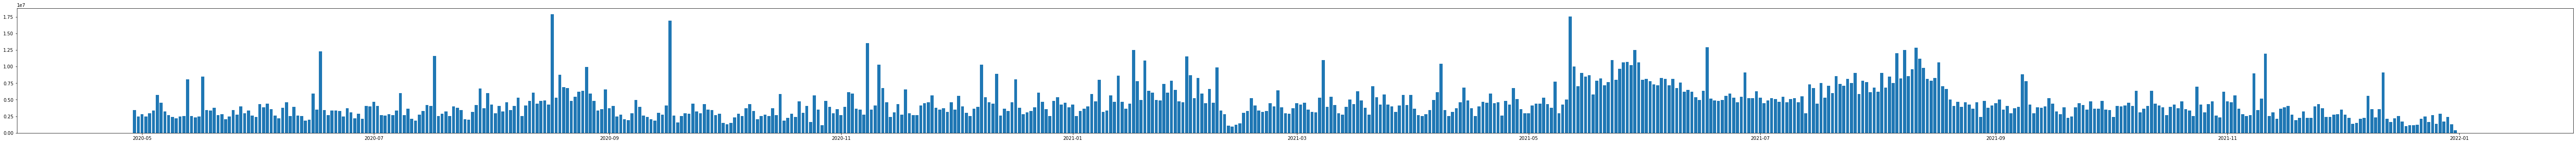

In [19]:
plt.figure(figsize=[100,5])
plt.bar(aaa.index,aaa['total_price'])

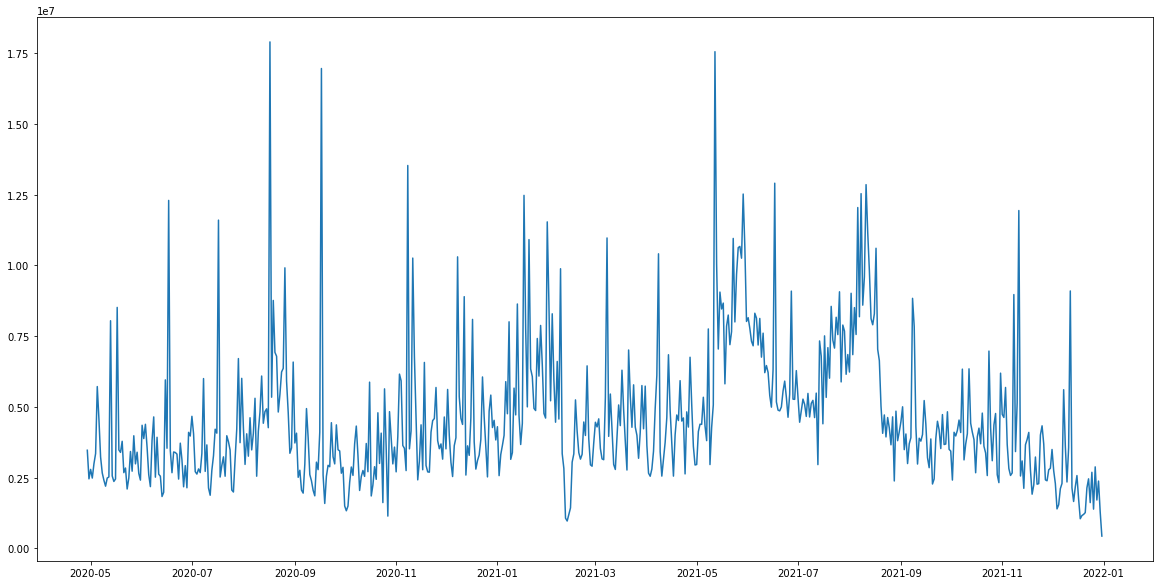

In [20]:
plt.figure(figsize=[20,10])
plt.plot(aaa)
plt.show()

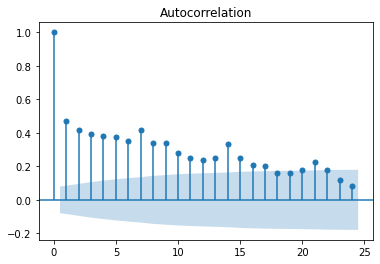

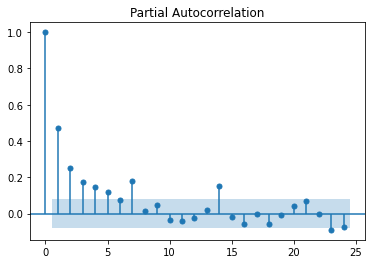

In [21]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
# 畫出 ACF(同一序列在不同時刻的取值之間的相關程度) 24 期的效應 
sm.graphics.tsa.plot_acf(aaa, lags=24)
plt.show()
# 畫出 PACF (兩觀測值的線性相關程度) 24 期的效應
sm.graphics.tsa.plot_pacf(aaa, lags=24)
plt.show()

In [22]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [23]:
# 產生 (X, Y) 資料集, Y 是下一期的乘客數
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [24]:
# 載入訓練資料
#dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
#dataset = dataframe.values
dataset = aaa.astype('float32')
# 正規化(normalize) 資料，使資料值介於[0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [25]:
# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [26]:
# 產生 (X, Y) 資料集, Y 是下一期的銷售額
look_back = 15
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [27]:
# 建立及訓練 LSTM 模型
model = Sequential()
model.add(LSTM(15, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=10, verbose=2)

Epoch 1/100
40/40 - 2s - loss: 0.0262 - 2s/epoch - 49ms/step
Epoch 2/100
40/40 - 0s - loss: 0.0160 - 67ms/epoch - 2ms/step
Epoch 3/100
40/40 - 0s - loss: 0.0157 - 66ms/epoch - 2ms/step
Epoch 4/100
40/40 - 0s - loss: 0.0155 - 71ms/epoch - 2ms/step
Epoch 5/100
40/40 - 0s - loss: 0.0153 - 68ms/epoch - 2ms/step
Epoch 6/100
40/40 - 0s - loss: 0.0153 - 71ms/epoch - 2ms/step
Epoch 7/100
40/40 - 0s - loss: 0.0150 - 78ms/epoch - 2ms/step
Epoch 8/100
40/40 - 0s - loss: 0.0150 - 71ms/epoch - 2ms/step
Epoch 9/100
40/40 - 0s - loss: 0.0149 - 71ms/epoch - 2ms/step
Epoch 10/100
40/40 - 0s - loss: 0.0148 - 68ms/epoch - 2ms/step
Epoch 11/100
40/40 - 0s - loss: 0.0148 - 71ms/epoch - 2ms/step
Epoch 12/100
40/40 - 0s - loss: 0.0147 - 68ms/epoch - 2ms/step
Epoch 13/100
40/40 - 0s - loss: 0.0146 - 74ms/epoch - 2ms/step
Epoch 14/100
40/40 - 0s - loss: 0.0147 - 70ms/epoch - 2ms/step
Epoch 15/100
40/40 - 0s - loss: 0.0145 - 71ms/epoch - 2ms/step
Epoch 16/100
40/40 - 0s - loss: 0.0146 - 68ms/epoch - 2ms/step
Ep

In [28]:
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

6/6 [==============================] - 0s 2ms/step


In [29]:
# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [30]:
# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2057254.30 RMSE
Test Score: 1609424.34 RMSE


In [31]:
# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [32]:
# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

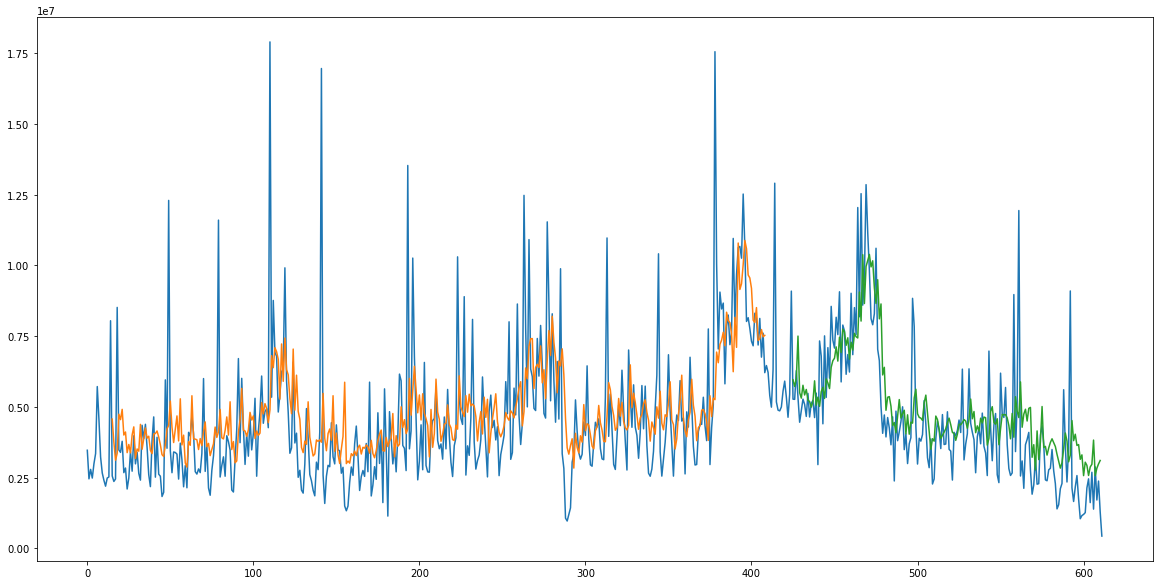

<Figure size 720x720 with 0 Axes>

In [33]:
# 畫原始資料趨勢圖
# plot baseline and predictions
plt.figure(figsize=[20,10])
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.figure(figsize=[10,10])
plt.show()
#橘色測試結果 #綠色預測結果

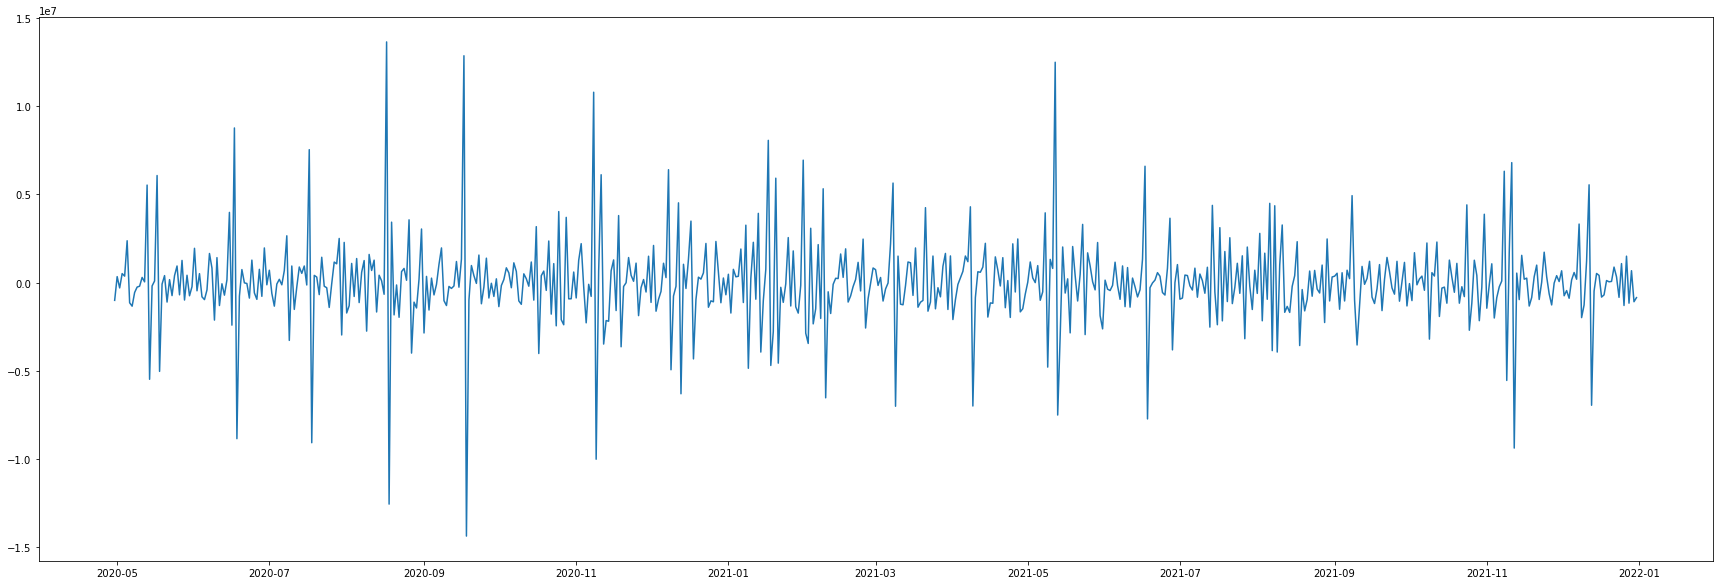

In [34]:
import pandas
import matplotlib.pyplot as plt
#dataset = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
# 一階差分
dataset1 = aaa.diff(1)
plt.figure(figsize=[30,10])

plt.plot(dataset1)
plt.show()

#去除趨勢

<BarContainer object of 612 artists>

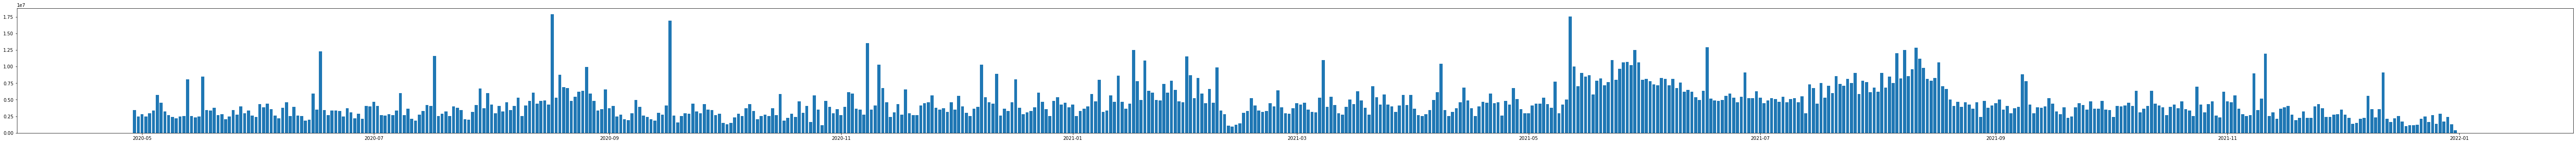

In [35]:
#計算每日銷售額，並且繪製
Price_time=df[['total_price','order_date_notime']]
daily_sale = pd.DataFrame()
daily_sale['total_price'] = Price_time.groupby(['order_date_notime'])['total_price'].sum()
plt.figure(figsize=[100,5])
plt.bar(daily_sale.index,aaa['total_price'])

In [36]:
#挑出特殊節日，繪製前2%的
special_day = daily_sale[daily_sale>daily_sale.quantile(0.98)].dropna()
special_day

,total_price
order_date_notime,
2020-06-17,12296593.0
2020-07-17,11599682.0
2020-08-17,17899937.0
2020-09-17,16959809.0
2020-11-08,13531202.0
2021-01-17,12475040.0
2021-05-12,17554083.0
2021-05-29,12521499.0
2021-06-17,12905262.0
